# Final EDA for Bill Classification and NLP:

In [1]:
!pip install psutil requests

In [ ]:
!pip install 

In [59]:
import mysql.connector 
import numpy as np
import pandas as pd
import config_final
import requests

from sodapy import Socrata
import sqlalchemy as db


import config_final as config
from schema import DbSchema

import matplotlib.pyplot as plt
import pickle


**Connect to Database**

In [3]:
bills_db = DbSchema(config)


In [4]:
#Query all titles and Passing

df = bills_db.query("""
    SELECT
        *
    FROM con_bills.current_bills as cb
    JOIN con_bills.topics as tp
    ON cb.BillID = tp.BillID
    WHERE cb.Cong >=110
    """)
df.head()

,BillID,BillType,Chamber,Cong,Cosponsr,IntrDate,Mult,PLaw,Title,Veto,...,PLawNum,ImpBill,Majority,Major,Minor,URL,Summary,Index,BillID,dominant_topic
0,110-HR-1,hr,0,110,205.0,2007-01-05 00:00:00,1,1,To provide for the implementation of the recom...,0,...,Became Public Law No: 110-53.,1,1,16.0,1615.0,https://www.congress.gov/bill/110th-congress/h...,Implementing Recommendations of the 9/11 Commi...,1,110-HR-1,5
1,110-HR-10,hr,0,110,0.0,2007-01-04 00:00:00,0,0,Reserved for Speaker.,0,...,0,1,1,20.0,2002.0,https://www.congress.gov/bill/110th-congress/h...,,2,110-HR-10,10
2,110-HR-100,hr,0,110,10.0,2007-01-04 00:00:00,0,0,To amend the Higher Education Act of 1965 to p...,0,...,0,1,1,6.0,601.0,https://www.congress.gov/bill/110th-congress/h...,Veterans' Equity in Education Act of 2007 - Am...,3,110-HR-100,4
3,110-HR-1000,hr,0,110,286.0,2007-02-12 00:00:00,0,0,To award a congressional gold medal to Edward ...,0,...,0,0,1,20.0,2006.0,https://www.congress.gov/bill/110th-congress/h...,Edward William Brooke III Congressional Gold M...,4,110-HR-1000,10
4,110-HR-1001,hr,0,110,0.0,2007-02-12 00:00:00,0,0,To amend the Haitian Hemispheric Opportunity t...,0,...,0,1,1,19.0,1921.0,https://www.congress.gov/bill/110th-congress/h...,Amends the Caribbean Basin Economic Recovery A...,5,110-HR-1001,5


In [5]:
# Drop the third party from 
indexNames = df[ df['Party'] == 328.0 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

df.Party.value_counts()

100.0    30400
200.0    20660
Name: Party, dtype: int64

In [6]:
# topic_dict = {0: 'border_enforcement', 1: 'taxes', 2: 'grants_higher_ed', 3: 'healthcare', 4: 'budget_appropriations', 
#               5: 'us_interior', 6: 'military', 7: 'designations', 8: 'energy_fuel', 9: 'entitlements_ss', 10: 'tariffs', 
#               11: 'education', 12: 'veterans_affairs'}



In [7]:
# topic_list = ['border_enforcement', 'taxes', 'grants_higher_ed', 'healthcare', 'budget_appropriations',
#              'us_interior', 'military', 'designations', 'energy_fuel', 'entitlements_ss', 'tariffs', 'education', 'veterans_affairs']

In [8]:
# df['dominant_topic_named'] = df['dominant_topic'].map(topic_dict)

In [9]:
df.dropna(subset=['IntrDate'], inplace=True)

In [10]:
df['month'] = df['IntrDate'].apply(lambda x: x.strftime('%B')) 

In [11]:
df['month_year'] = df['IntrDate'].apply(lambda x: x.strftime('%Y-%m')) 

In [12]:
df.head()

,BillID,BillType,Chamber,Cong,Cosponsr,IntrDate,Mult,PLaw,Title,Veto,...,Majority,Major,Minor,URL,Summary,Index,BillID,dominant_topic,month,month_year
0,110-HR-1,hr,0,110,205.0,2007-01-05 00:00:00,1,1,To provide for the implementation of the recom...,0,...,1,16.0,1615.0,https://www.congress.gov/bill/110th-congress/h...,Implementing Recommendations of the 9/11 Commi...,1,110-HR-1,5,January,2007-01
1,110-HR-10,hr,0,110,0.0,2007-01-04 00:00:00,0,0,Reserved for Speaker.,0,...,1,20.0,2002.0,https://www.congress.gov/bill/110th-congress/h...,,2,110-HR-10,10,January,2007-01
2,110-HR-100,hr,0,110,10.0,2007-01-04 00:00:00,0,0,To amend the Higher Education Act of 1965 to p...,0,...,1,6.0,601.0,https://www.congress.gov/bill/110th-congress/h...,Veterans' Equity in Education Act of 2007 - Am...,3,110-HR-100,4,January,2007-01
3,110-HR-1000,hr,0,110,286.0,2007-02-12 00:00:00,0,0,To award a congressional gold medal to Edward ...,0,...,1,20.0,2006.0,https://www.congress.gov/bill/110th-congress/h...,Edward William Brooke III Congressional Gold M...,4,110-HR-1000,10,February,2007-02
4,110-HR-1001,hr,0,110,0.0,2007-02-12 00:00:00,0,0,To amend the Haitian Hemispheric Opportunity t...,0,...,1,19.0,1921.0,https://www.congress.gov/bill/110th-congress/h...,Amends the Caribbean Basin Economic Recovery A...,5,110-HR-1001,5,February,2007-02


In [13]:
# df.loc[:,['dominant_topics']].transform(lambda x: x.map(lambda x: topic_dict.get(x,x)))

# Sorted Dataframes for Passed Bills and Not Passed Bills

In [14]:
#PASSED BILL ONLY
passed_bills = df[df['PassH'] == 1]
len(passed_bills)

4021

In [15]:
passed_bills.head()

,BillID,BillType,Chamber,Cong,Cosponsr,IntrDate,Mult,PLaw,Title,Veto,...,Majority,Major,Minor,URL,Summary,Index,BillID,dominant_topic,month,month_year
0,110-HR-1,hr,0,110,205.0,2007-01-05 00:00:00,1,1,To provide for the implementation of the recom...,0,...,1,16.0,1615.0,https://www.congress.gov/bill/110th-congress/h...,Implementing Recommendations of the 9/11 Commi...,1,110-HR-1,5,January,2007-01
6,110-HR-1003,hr,0,110,4.0,2007-02-12 00:00:00,1,1,To amend the Foreign Affairs Reform and Restru...,0,...,1,19.0,1929.0,https://www.congress.gov/bill/110th-congress/h...,This measure has not been amended since it was...,7,110-HR-1003,7,February,2007-02
9,110-HR-1006,hr,0,110,1.0,2007-02-13 00:00:00,1,0,To amend the provisions of law relating to the...,0,...,0,7.0,709.0,https://www.congress.gov/bill/110th-congress/h...,Marine Mammal Rescue Assistance Amendments of ...,10,110-HR-1006,0,February,2007-02
15,110-HR-1011,hr,0,110,6.0,2007-02-13 00:00:00,1,0,To designate additional National Forest System...,0,...,1,21.0,2103.0,https://www.congress.gov/bill/110th-congress/h...,Virginia Ridge and Valley Act of 2007 - Design...,16,110-HR-1011,11,February,2007-02
18,110-HR-1014,hr,0,110,238.0,2007-02-13 00:00:00,0,0,"To amend the Federal Food, Drug, and Cosmetic ...",0,...,1,3.0,331.0,https://www.congress.gov/bill/110th-congress/h...,"Heart Disease Education, Analysis Research, an...",19,110-HR-1014,12,February,2007-02


In [16]:
#NOT PASSED BILLS ONLY
not_passed_bills = df[df['PassH'] == 0]
len(not_passed_bills)

46997

**Overview**

Important coding:
    
- Party: (100 Democrat; 200 Republican, 328…from ICPSR)
- Cosponsor: Number of cosponsors
    
Shape: 
- 51067, 29

PassH: 
- 47042, 4025

Party: 
- Dem - 30400
- Rep - 20660

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51018 entries, 0 to 51066
Data columns (total 34 columns):
BillID            51018 non-null object
BillType          51018 non-null object
Chamber           51018 non-null int64
Cong              51018 non-null int64
Cosponsr          51018 non-null float64
IntrDate          51018 non-null object
Mult              51018 non-null int64
PLaw              51018 non-null int64
Title             51018 non-null object
Veto              51018 non-null int64
Class             51018 non-null float64
District          51018 non-null float64
FrstConH          51018 non-null float64
FrstConS          51018 non-null float64
Gender            51018 non-null int64
MRef              51018 non-null int64
NameFull          51018 non-null object
Party             51018 non-null float64
Postal            51018 non-null object
PassH             51018 non-null int64
PassS             51018 non-null int64
PLawDate          1392 non-null object
PLawNum        

# **Explore Title Length:**

In [18]:
df['title_len'] = [len(summary) for summary in df['Title']]

In [19]:
df['Summary'].fillna('', inplace=True)

/Users/melissamunz/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [20]:
#Median Bill Title length by congress, passed or didn't pass
df.groupby(['PLaw','Cong'])['title_len'].agg('median')

PLaw  Cong
0     110     151.0
      111     154.0
      112     139.0
      113     157.0
      114     158.0
1     110     199.5
      111     186.0
      112     178.0
      113     169.0
      114     175.0
Name: title_len, dtype: float64

# **Visualizations by Congress:**

In [21]:
df['Cong'].value_counts()

110    11065
111    10624
112    10415
114    10048
113     8866
Name: Cong, dtype: int64

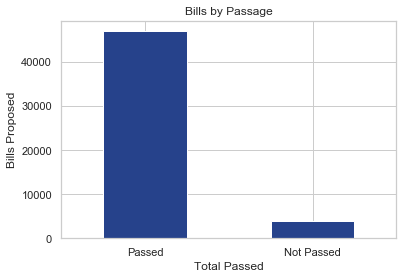

In [60]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette(["#26428B"])

# loc=range(len(df['PassH']))
labels = ['Passed','Not Passed']

ax = df['PassH'].value_counts().plot.bar()
plt.title('Bills by Passage')
plt.xlabel('Total Passed')
plt.ylabel('Bills Proposed')
# plt.yticks(labels)

ax.set_xticklabels(labels,  rotation="horizontal")
# plt.savefig('Bill_Split_2.png')
plt.show()


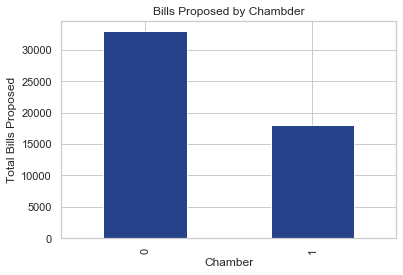

In [61]:
df['Chamber'].value_counts().plot.bar()

chamber = ['House', 'Senate']

plt.title('Bills Proposed by Chambder')
plt.xlabel('Chamber')
plt.ylabel('Total Bills Proposed')
# plt.yticks(labels)

ax.set_xticklabels(labels,  rotation="horizontal")

plt.savefig('Chamber_Split.png')



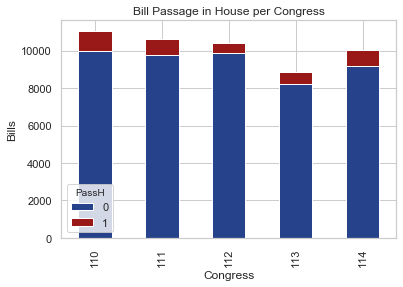

In [121]:
#Portion of bills proposed for all congresses vs those that passed the house 

sns.set_palette(['#26428B',"#991919"])

df.groupby(['Cong', 'PassH']).size().unstack().plot.bar(stacked=True).set_title('Bill Passage in House per Congress')

plt.xlabel('Congress')
plt.ylabel('Bills')


plt.savefig('Bill_passage_House_Cong.png')

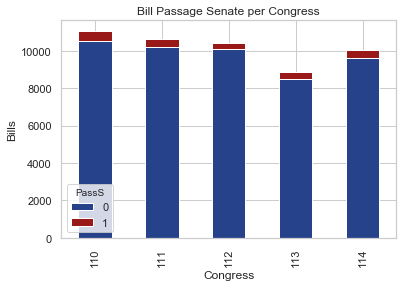

In [122]:
#Portion of bills proposed for all congresses vs those that passed the house 
df.groupby(['Cong', 'PassS']).size().unstack().plot.bar(stacked=True).set_title('Bill Passage Senate per Congress')

plt.xlabel('Congress')
plt.ylabel('Bills')


plt.savefig('Bill_passage_Senate_Cong.png')

Text(0.5, 1.0, 'Bill Proposal by Party')

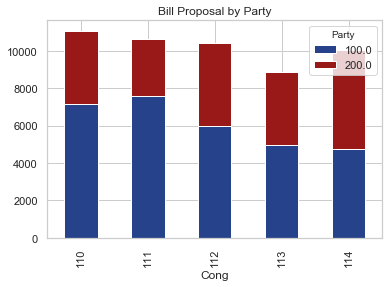

In [123]:
df.groupby(['Cong', 'Party']).size().unstack().plot.bar(stacked=True).set_title('Bill Proposal by Party')


Text(0.5, 1.0, 'Bill Passage by Majority')

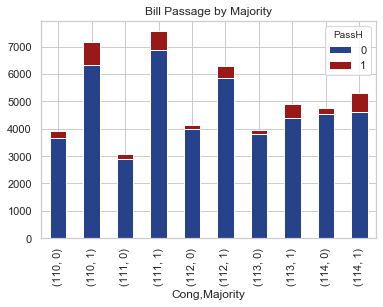

In [124]:
df.groupby(['Cong', 'Majority', 'PassH']).size().unstack().plot.bar(stacked=True).set_title('Bill Passage by Majority')


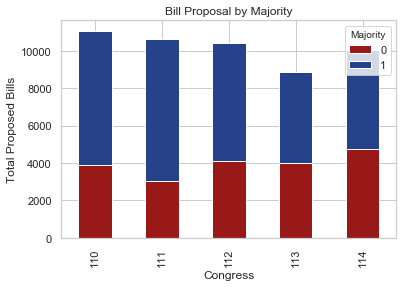

In [127]:
sns.set_palette(["#991919", '#26428B',])
df.groupby(['Cong', 'Majority']).size().unstack().plot.bar(stacked=True).set_title('Bill Proposal by Majority')

plt.xlabel('Congress')
plt.ylabel('Total Proposed Bills')


plt.savefig('Majority_by_Congress.png')

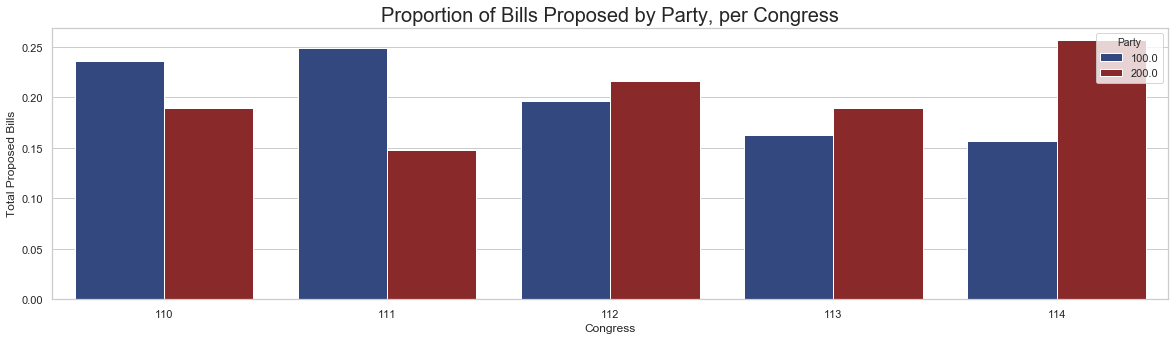

In [131]:
#Proportional Party breakdown by Congress
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_palette(['#26428B',"#991919"])
plt.figure(figsize=(20,5))


x, y, hue = "Cong", "proportion", "Party"
hue_order = ["1", "0"]
data=df

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue)).set_title('Proportion of Bills Proposed by Party, per Congress', fontsize=20)

plt.xlabel('Congress')
plt.ylabel('Total Proposed Bills')

plt.savefig('Majority_by_Congress2.png')

In [31]:
df.shape

(51018, 35)

# Vizualizations by Recommending Congressperson

**Exploration by Congressperson Gender:**

Text(0.5, 1.0, 'Bill Proposal by Gender')

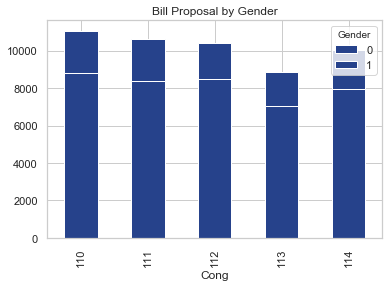

In [32]:
#All bills proposed in each congress, by Gender

df.groupby(['Cong', 'Gender']).size().unstack().plot.bar(stacked=True).set_title('Bill Proposal by Gender')


**Exploration of Party Breakdown by Congress:**

Text(0.5, 1.0, 'Proportion Bill Passage in House by Congress')

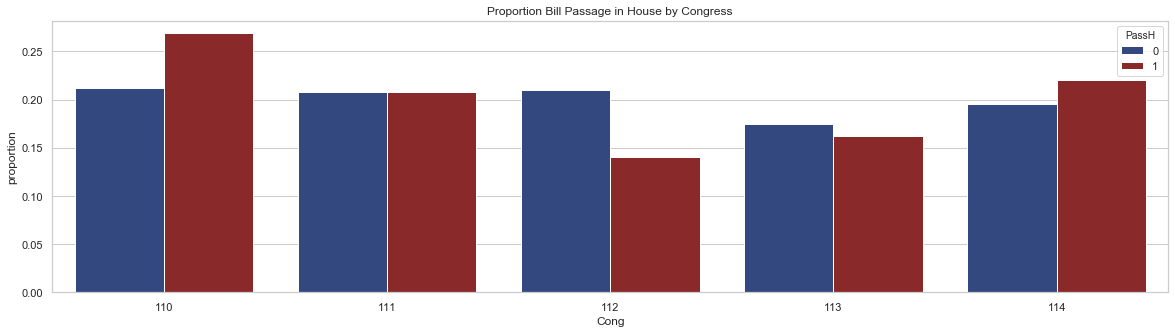

In [132]:
#Proportional Party breakdown by Congress
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(20,5))

x, y, hue = "Cong", "proportion", "PassH"
hue_order = ["1", "0"]
data=df

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue)
 .set_title('Proportion Bill Passage in House by Congress'))


# Visualization by State, District

.size includes NaN values, .count does not

Text(0.5, 1.0, 'Party breakdown by State')

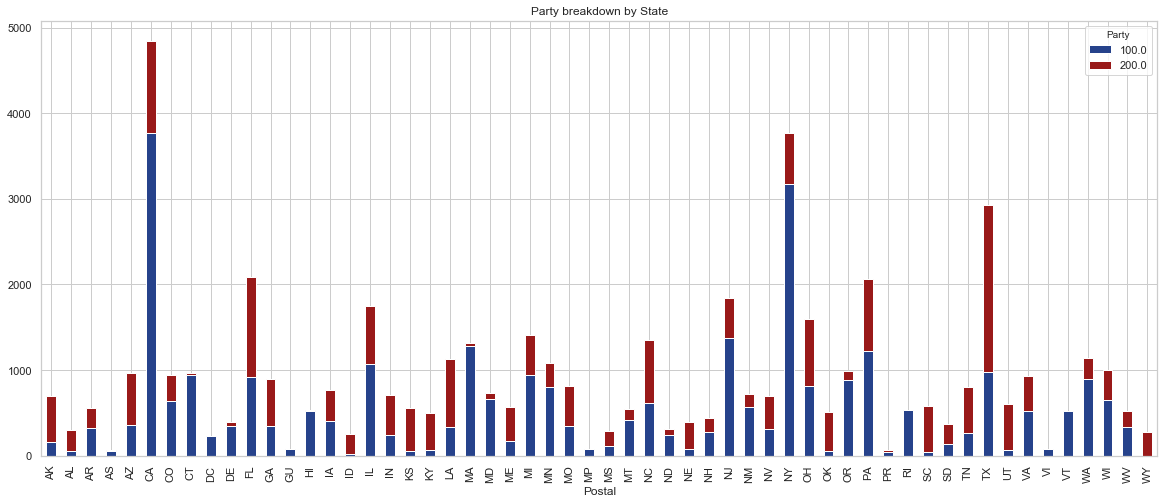

In [133]:
#Breakdown of bills proposed by party by state

df.groupby(['Postal', 'Party']).size().unstack().plot.bar(figsize=(20,8), stacked=True).set_title('Party breakdown by State')

Text(0.5, 1.0, 'State Bill Proposal Breakdown by Congressperson Party')

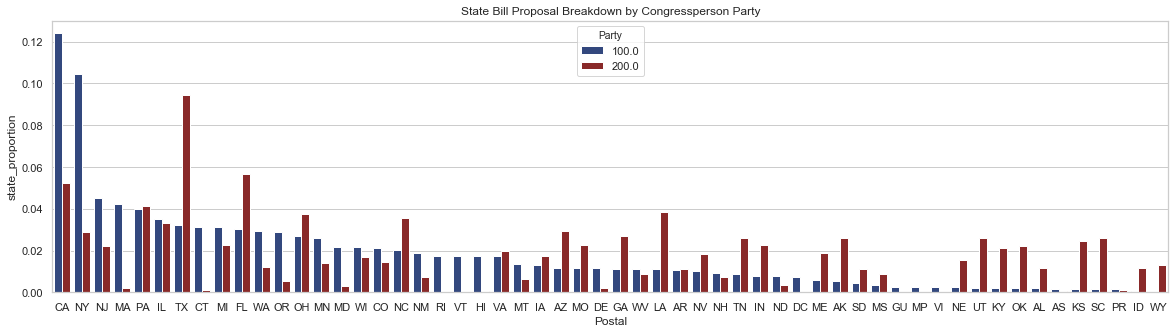

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(20,5))

x, y, hue = "Postal", "state_proportion", "Party"
hue_order = ["100", "200"]
data=df

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue)).set_title('State Bill Proposal Breakdown by Congressperson Party')


Text(0.5, 1.0, 'Bill Passage by State')

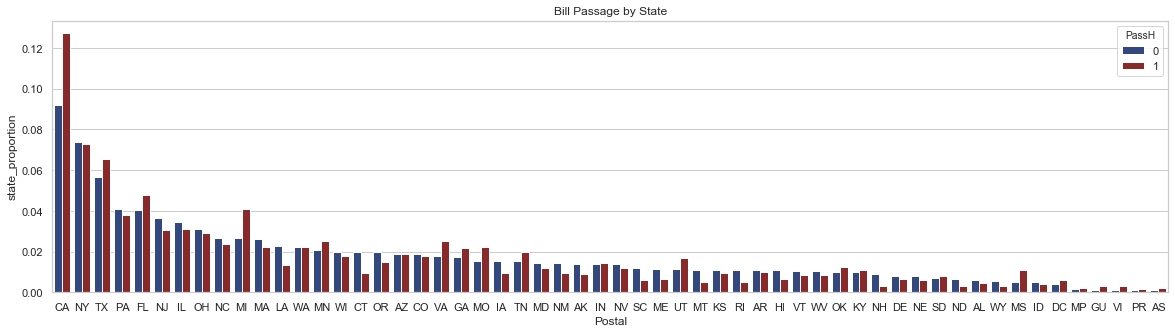

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(20,5))

x, y, hue = "Postal", "state_proportion", "PassH"
hue_order = ["1", "0"]
data=df

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue)).set_title('Bill Passage by State')


In [136]:
df.shape

(51018, 35)

**Mapped Bill Passage by State**

In [137]:
#Find percent bills passed for each state

total_bills = df.groupby('Postal').size()
proposed_bills = df[df['PassH'] == 1].groupby('Postal').size()
# df_success_rage = pd.concat(total_bills.to_frame(), proposed_bills.to_frame())
def percentage(x, y):
    return x / y * 100

percent_bills = proposed_bills.combine(total_bills, percentage)

In [138]:
percent_df = percent_bills.to_frame()

In [139]:
percent_df = percent_df.reset_index()

In [140]:
percent_df = percent_df[~percent_df['Postal'].isin(['AS', 'GU', 'PR', 'VI', 'DC'])]
len(percent_df)

51

In [141]:
percent_df = percent_df.rename(columns={"Postal": "State", 0: "Percent_Passed"})

In [142]:
percent_df.head()

,State,Percent_Passed
0,AK,5.285714
1,AL,6.354515
2,AR,7.454545
4,AZ,7.796258
5,CA,10.562216


In [143]:
import plotly.express as px  # Be sure to import express

colorscale='RdBu'

fig = px.choropleth(percent_df,  # Input Pandas DataFrame
                    locations="State",  # DataFrame column with locations
                    color="Percent_Passed",  # DataFrame column with color values
                    hover_name="State", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Percentage of Passed Bills by Proposing State Representative', # Create a Title
    geo_scope='usa',
)
fig.show()  # Output the plot to the screen

In [144]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [200]:
import plotly.graph_objects as go

import pandas as pd

for col in percent_df.columns:
    percent_df[col] = percent_df[col].astype(str)

#Hover text
# percent_df['text'] = df['State'] + '<br>' + \
#     'Beef ' + df['beef'] + ' Dairy ' + df['dairy'] + '<br>' + \
#     'Fruits ' + df['total fruits'] + ' Veggies ' + df['total veggies'] + '<br>' + \
#     'Wheat ' + df['wheat'] + ' Corn ' + df['corn']

fig = go.Figure(data=go.Choropleth(
    locations=percent_df['State'],
    z=percent_df['Percent_Passed'].astype(float),
    locationmode='USA-states',
    colorscale='Blues',
    autocolorscale=False,
#     text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Percent Passed"
))

fig.update_layout(
    title_text='Percentage of Passed Bills by Proposing State Representative',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)


# fig.write_image("bill_passage_by_state_2.png")
fig.show()

# Exploration of Bills by Topic (LDA)

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="dominant_topic", barmode="group",
             facet_row="PassH", facet_col="Cong",
             category_orders={"Cong": ["110", "111", "112", "113", "114"],
                              "PassH": ["0", "1"]})
fig.layout.yaxis1.update(matches=None)
fig.show()

In [146]:
topics_df = df.groupby(['Cong', 'dominant_topic', 'PassH']).size()


In [147]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# layout = {
#     'title_text':'Industrial Production Y/Y Growth Level %s by Subsector',
#     'colorscale': {'categorical':'dark24'}
# }

fig = make_subplots(
    rows=13, cols=5, shared_xaxes=True, vertical_spacing=0.02
) 
fig = px.histogram(df, x="PassH", barmode="group",
            facet_row="dominant_topic", facet_col="Cong",
            category_orders={"Cong": ["110", "111", "112", "113", "114"],
                            "dominant_topic": ["0", "1", "2", "3", "4", "5", "6","7","8","9","10","11","12","13"]})


fig.update_layout(
    title="All Topics by Congress",
    xaxis_title="Pass House",
    yaxis_title="Count Proposed",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.update_layout(height=2000, width=800, title_text="All Bills Passed by Congress and Topic")
fig.show()

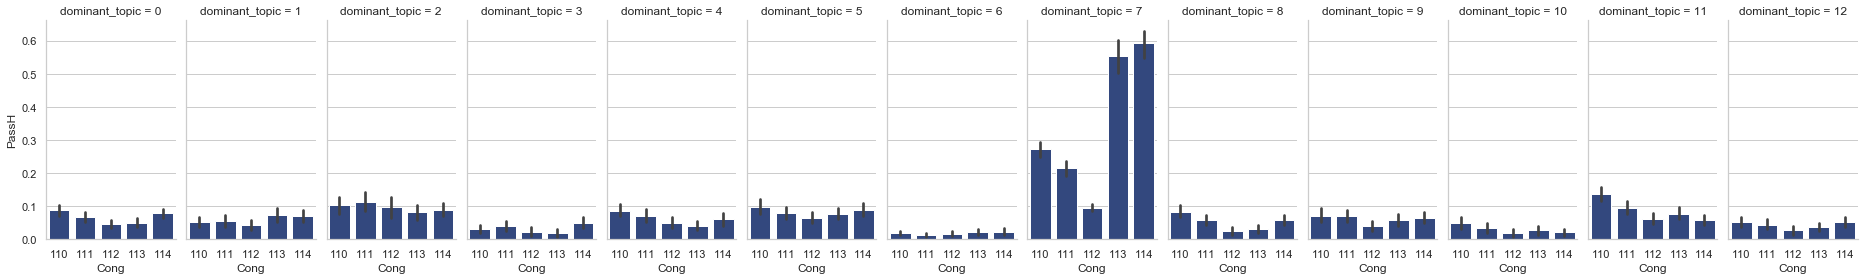

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# nr_rows = 13
# nr_cols = 5

# cols_review = ['Cong', 'PassH', 'dominant_topic']

g = sns.FacetGrid(df, col="dominant_topic", height=4, aspect=.5)
g.map(sns.barplot, "Cong", "PassH");

In [149]:
# df = df[["Year", "Sport", "Country", "Gender", "Event", "Medal"]].drop_duplicates()

passed_topics = passed_bills.groupby(["Cong", "dominant_topic"])["PassH"].count().unstack()
passed_topics

dominant_topic,0,1,2,3,4,5,6,7,8,9,10,11,12
Cong,,,,,,,,,,,,,
110,98,40,50,21,71,72,22,381,74,45,25,141,40
111,68,35,49,27,49,67,16,286,54,46,17,88,34
112,45,23,32,10,33,53,15,235,17,28,8,50,16
113,55,40,37,9,29,65,19,230,20,42,13,69,26
114,106,49,58,35,38,68,23,313,45,52,11,48,40


Text(0.5, 1.0, 'Topics by Congress and Title')

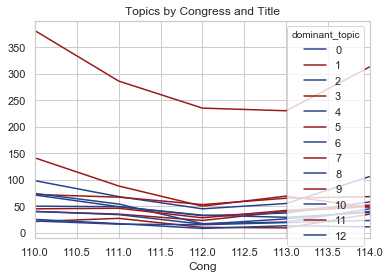

In [150]:
passed_topics.plot().set_title('Topics by Congress and Title')

In [151]:
# passed_topics = passed_topics.rename(columns = {0: 'border_enforcement', 1: 'taxes', 2: 'grants_higher_ed', 3: 'healthcare', 4: 'budget_appropriations', 
#               5: 'us_interior', 6: 'military', 7: 'designations', 8: 'energy_fuel', 9: 'entitlements_ss', 10: 'tariffs', 
#               11: 'education', 12: 'veterans_affairs'}, inplace=True)

In [53]:
# y0 = passed_topics[0]
# y1 = passed_topics[1]
# y2 = passed_topics[2]
# y3 = passed_topics[3]
# y4 = passed_topics[4]
# y5 = passed_topics[5]


In [54]:
# plt.figure(figsize=(12,8))
# sm.T.plot.area(color=colors, ax=plt.gca(), alpha=0.5)

# # Reverse the order of labels, so they match the data
# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles[::-1], labels[::-1])

# # Set labels and remove superfluous plot elements
# plt.ylabel("Number of medals")
# plt.title("Stacked areachart of select countries' medals at the Summer Olympics")
# plt.xticks(sm.columns, rotation=90)
# sns.despine()

In [152]:
# passed_topics_names = passed_bills.groupby(["Cong", "dominant_topic_named"])["PassH"].count().unstack()
# passed_topics_names

In [204]:


import plotly.graph_objects as go

x=[110,111,112,113,114]


fig = go.Figure()

# for item in topic_list:
# #     if i == 7:
# #         continue
fig.add_trace(go.Scatter(
    x=x, y=df'dominant_topics',
#         hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5),
    stackgroup='one',
    groupnorm='percent'
    ))

fig.update_layout(
    showlegend=True,
    xaxis_type='category',
    yaxis=dict(
        type='linear',
        range=[1, 100],
        ticksuffix='%'))
fig.show()

SyntaxError: invalid syntax (<ipython-input-204-d91dcb0d4637>, line 12)

In [173]:
final_topic_labels = ['Immigration', 'Energy', 'Veterans_Affairs', 'Entitlements', 'Defense', 
                      'Appropriations', 'Taxes', 'Tariffs', 'Federal_Grants', 'Transport', 
                      'Education', 'US_Interior','Healthcare']

In [174]:
import plotly.graph_objects as go

x=[110,111,112,113,114]

fig = go.Figure()

for i in range(13):
#     if i == 7:
#         continue
    fig.add_trace(go.Scatter(
        x=x, y=passed_topics[i],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5),
        stackgroup='one',
        groupnorm='percent',
        name=final_topic_labels[i]
    ))

    
fig.update_layout(
    title="Passed Topics by Congress",
    xaxis_title="Congress",
    yaxis_title="Percent Topic",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#26428B"
    )
)

fig.update_layout(
    showlegend=True,
    xaxis_type='category',
    yaxis=dict(
        type='linear',
        range=[1, 100],
        ticksuffix='%'))

    
fig.show()

In [155]:
not_passed_topics = not_passed_bills.groupby(["Cong", "dominant_topic"])["PassH"].count().unstack()
not_passed_topics

dominant_topic,0,1,2,3,4,5,6,7,8,9,10,11,12
Cong,,,,,,,,,,,,,
110,1027,720,438,652,753,657,1192,1022,817,582,486,894,745
111,944,586,381,629,650,782,1256,1048,872,602,478,829,731
112,926,516,301,458,633,753,914,2251,677,662,428,757,574
113,1034,506,412,481,676,775,836,185,647,678,467,824,691
114,1236,660,591,671,594,697,970,216,736,746,518,793,734


In [175]:
import plotly.graph_objects as go

x=[110,111,112,113,114]

fig = go.Figure()

for i in range(13):
#     if i == 7:
#         continue
    fig.add_trace(go.Scatter(
        x=x, y=not_passed_topics[i],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5),
        stackgroup='one',
        groupnorm='percent',
        name=final_topic_labels[i]
    ))
    
fig.update_layout(
    title="NOT Passed Topics by Congress",
    xaxis_title="Congress",
    yaxis_title="Percent Topic",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#26428B"
    )
)

fig.update_layout(
    showlegend=True,
    xaxis_type='category',
    yaxis=dict(
        type='linear',
        range=[1, 100],
        ticksuffix='%'))
fig.show()

# Natural Language Processing - Final EDA

In [176]:
df['title_len'] = [len(summary) for summary in df['Title']]

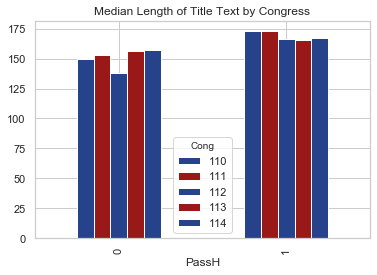

In [182]:
labels = ['Not Passed', 'Passed']
df.groupby(['PassH','Cong'])['title_len'].agg('median').unstack().plot.bar().set_title('Median Length of Title Text by Congress')
ax.set_xticklabels(labels,  rotation="horizontal")

plt.savefig('Title_Len.png')

In [183]:
#find median length of all titles
df['title_len'].median()

153.0

# Exploration of Congresspersons

In [184]:
#Bill vs number of Congresspersons - whip and majority or others?

In [185]:
df['NameFull'].value_counts().head()

Charles Schumer     477
Dianne Feinstein    452
Robert Casey        447
David Vitter        409
Robert Menendez     408
Name: NameFull, dtype: int64

In [186]:
from collections import Counter

all_names_dict = dict(Counter(df['NameFull']))

In [187]:
top_names = {key: value for key, value in all_names_dict.items() if value >= 100}


In [188]:
for name in sorted(top_names, key=top_names.get, reverse = True):
    print(name, top_names[name])

Charles Schumer 477
Dianne Feinstein 452
Robert Casey 447
David Vitter 409
Robert Menendez 408
Sherrod Brown 393
Ron Wyden 317
Amy Klobuchar 296
Barbara Boxer 295
John Kerry 287
Richard Durbin 285
Carolyn Maloney 267
Don Young 262
Kirsten Gillibrand 250
Edward Markey 242
Sheila Jackson Lee 233
Eleanor Norton 226
Lisa Murkowski 224
Orrin Hatch 219
Mary Landrieu 217
Jon Tester 214
Alan Grayson 214
Patrick Leahy 213
Jeff Bingaman 212
Carl Levin 210
John Rockefeller 209
Steve Israel 206
Benjamin Cardin 203
Patty Murray 203
Thomas Harkin 202
Charles Grassley 202
Frank Lautenberg 199
Max Baucus 199
Bill Nelson 199
Olympia Snowe 193
Kay Hagan 192
Maria Cantwell 191
Harry Reid 189
John Cornyn 189
John Reed 187
Bernard Sanders 185
John Conyers 184
Susan Collins 181
Mark Kirk 179
Ronald Paul 177
Richard Burr 176
Dean Heller 174
Bob Filner 172
James Inhofe 170
Rosa DeLauro 169
Jim McDermott 169
Mark Begich 164
Daniel Akaka 161
Earl Blumenauer 159
Richard Blumenthal 159
Mark Udall 158
Tom Udall 15

Text(0.5, 1.0, 'Ranked Congresspersons by Career Bill Proposal Count')

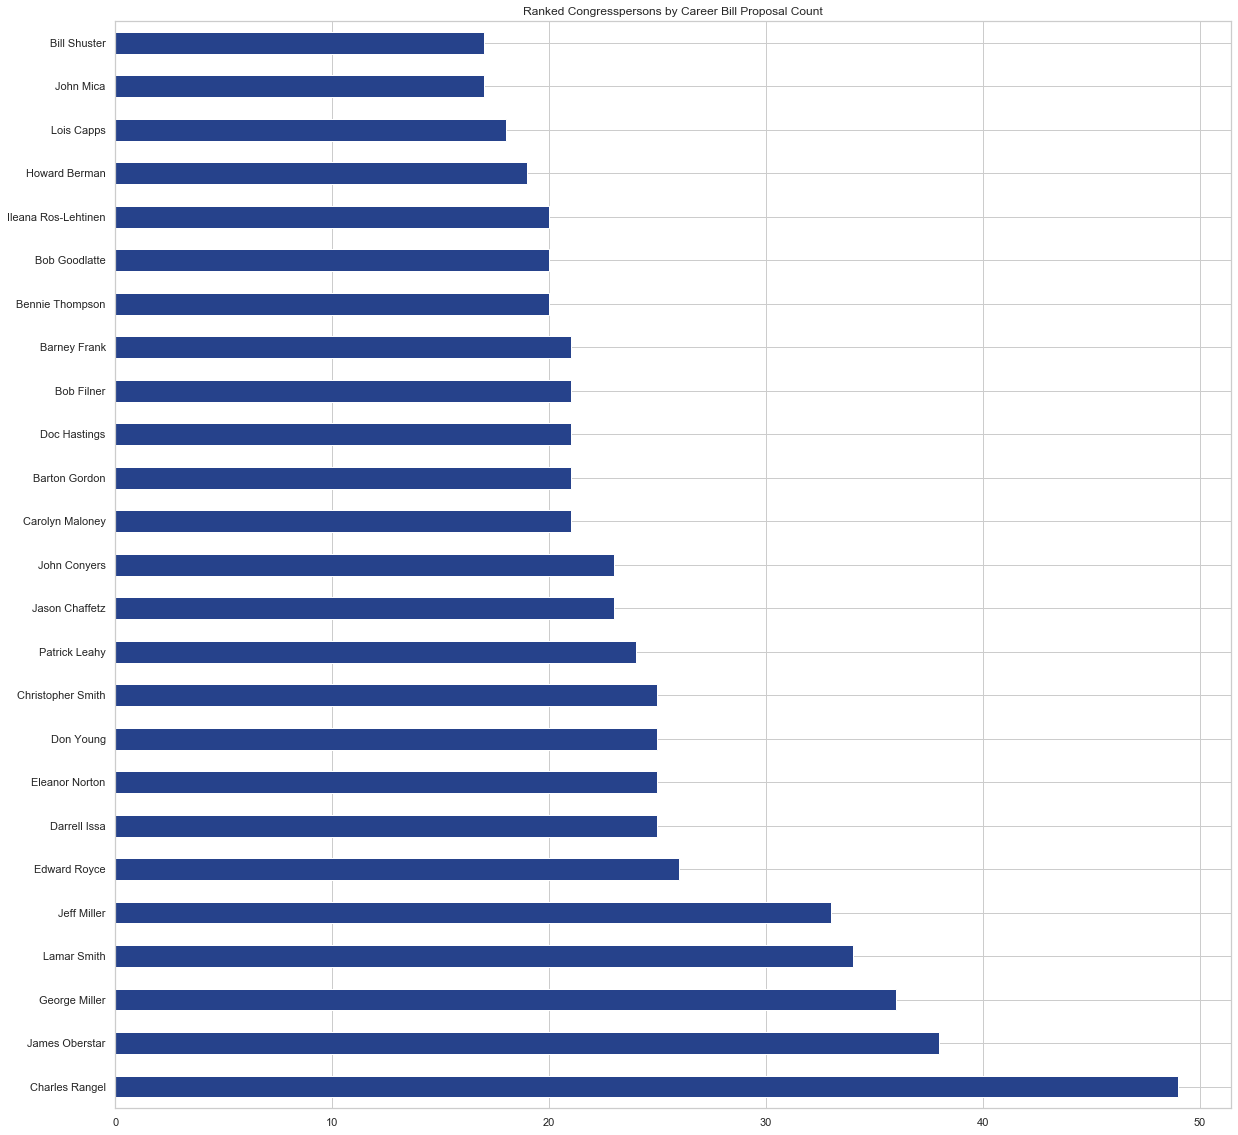

In [189]:
# The top 50 Congresspersons and number of bill introductions
#DO THIS BY PARTY

passed_bills['NameFull'].value_counts().head(25).plot(kind='barh', figsize=(20,20)).set_title('Ranked Congresspersons by Career Bill Proposal Count')

Text(0.5, 1.0, 'Ranked Congresspersons by Career Bill Proposal Count')

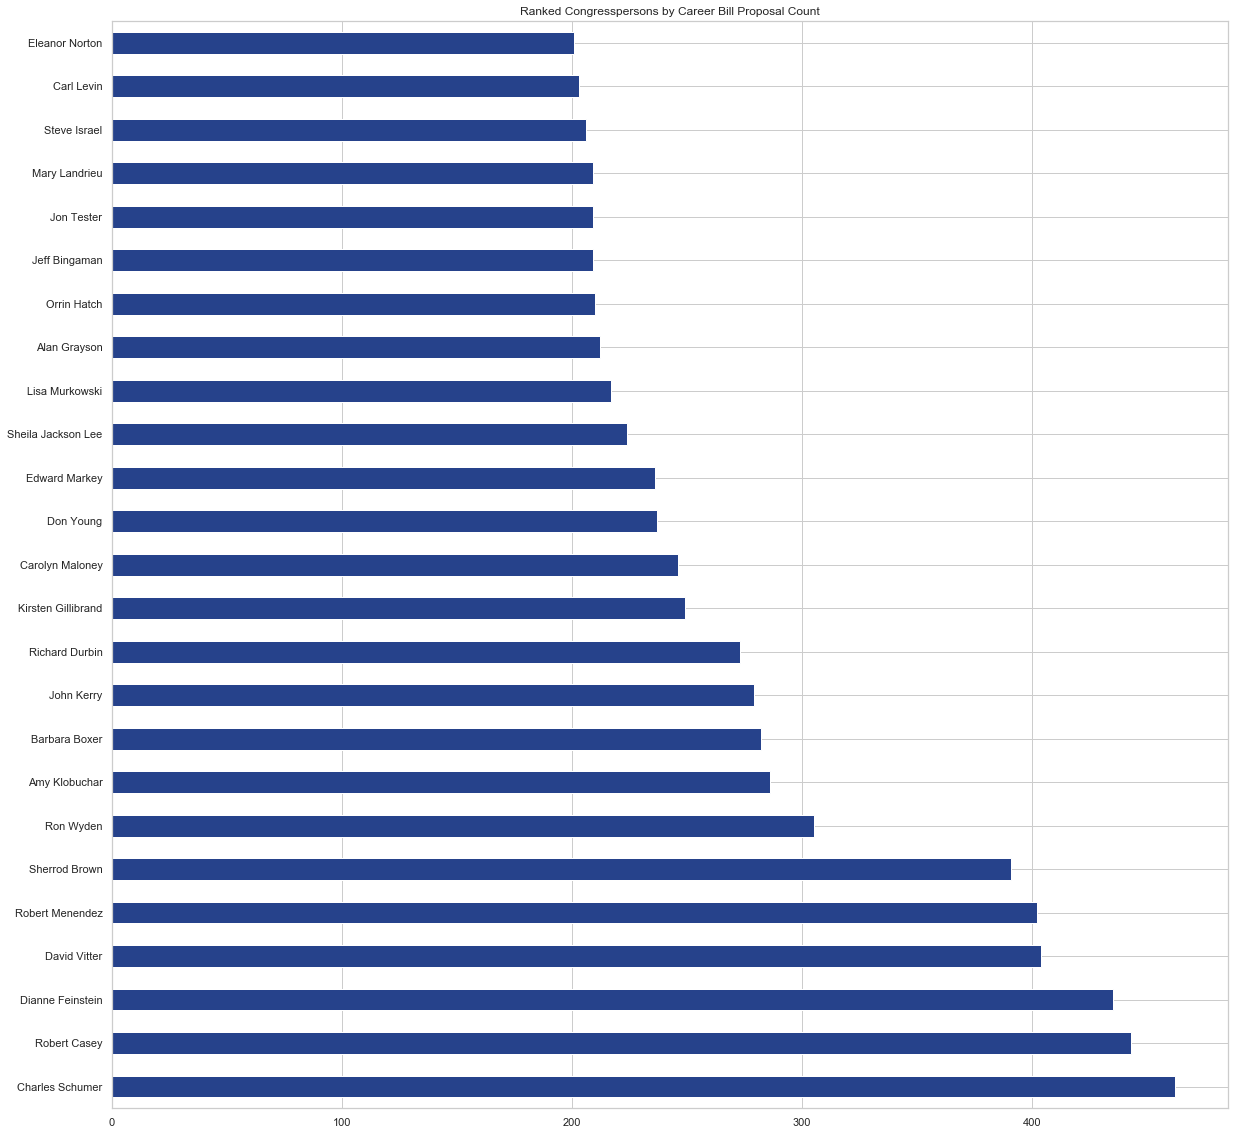

In [190]:

not_passed_bills['NameFull'].value_counts().head(25).plot(kind='barh', figsize=(20,20)).set_title('Ranked Congresspersons by Career Bill Proposal Count')

Text(0.5, 1.0, 'Proposed/passed Bills by Congressperson')

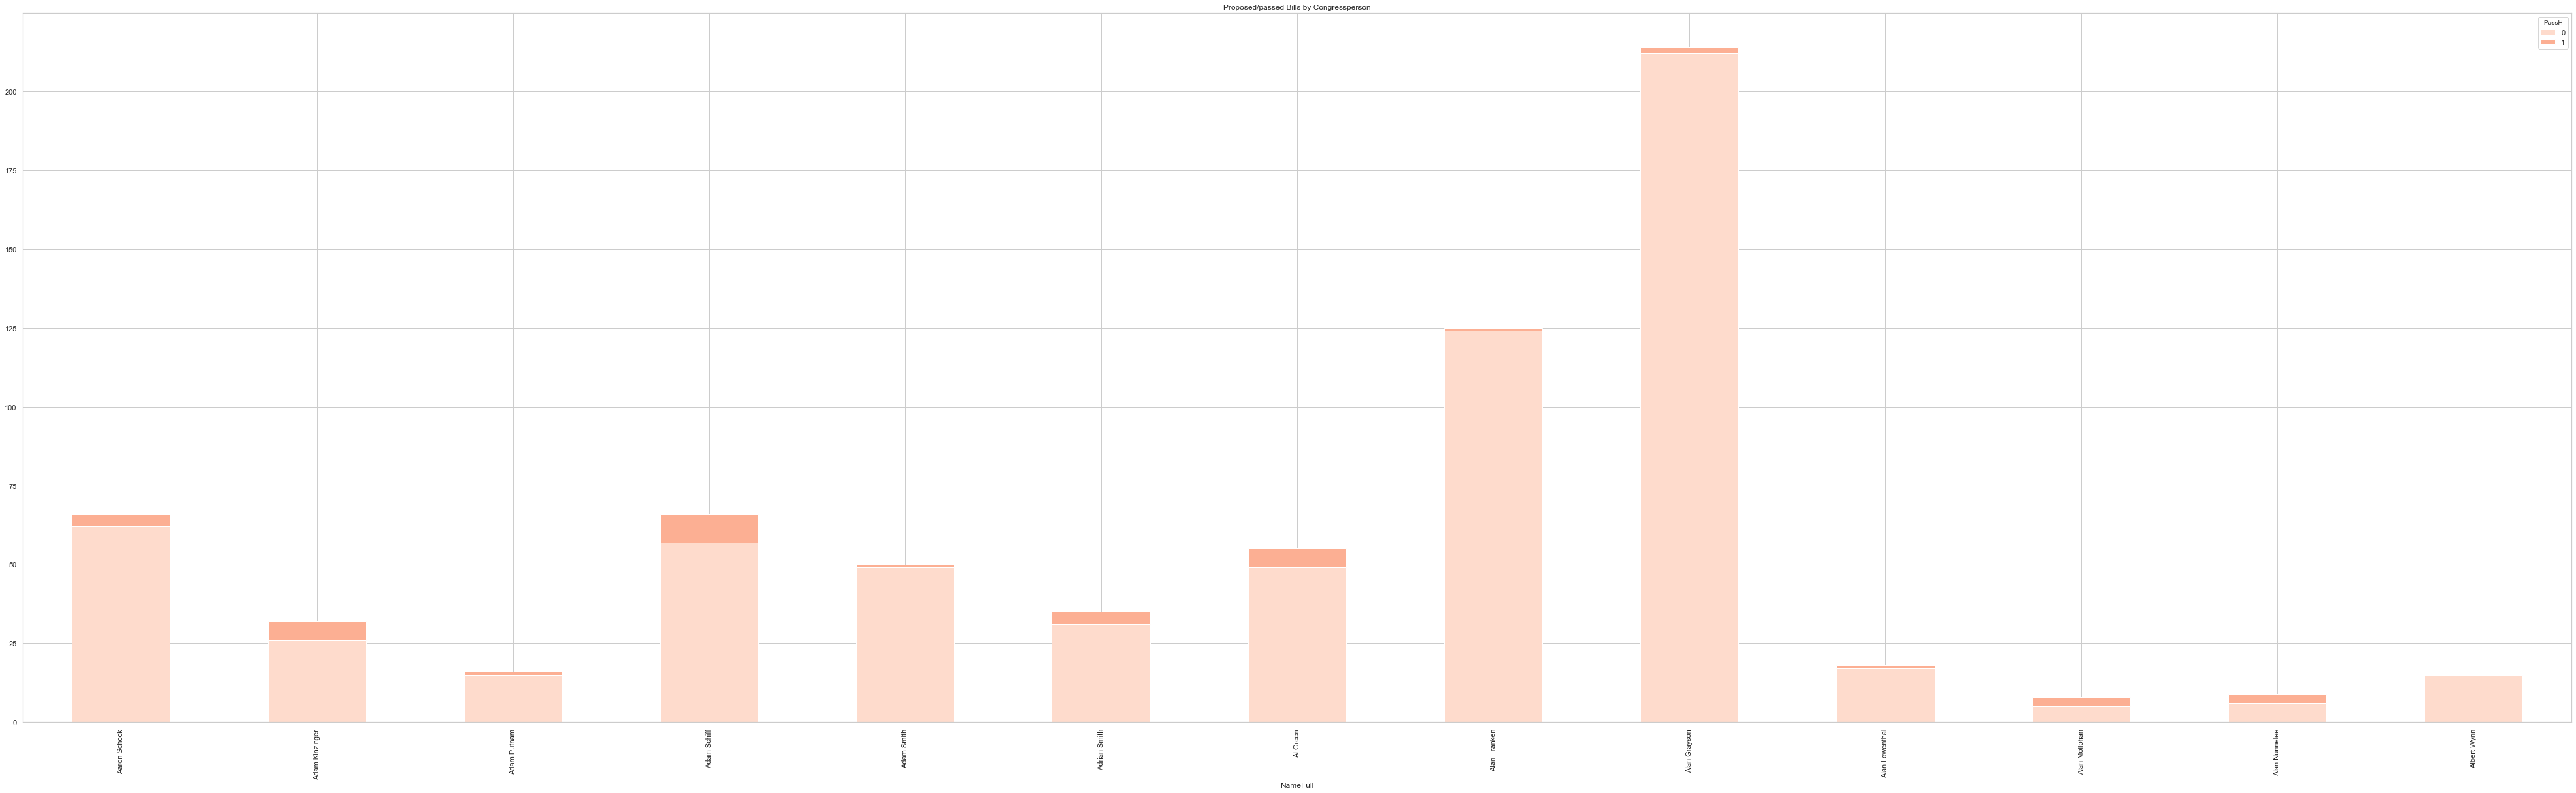

In [191]:
sns.set_palette("Reds")
df.groupby(['NameFull','PassH']).size().head(25).unstack().plot.bar(figsize=(70,20), stacked=True).set_title('Proposed/passed Bills by Congressperson')


# Vizualizations by Month:

Text(0.5, 1.0, 'Passed Bills by Month')

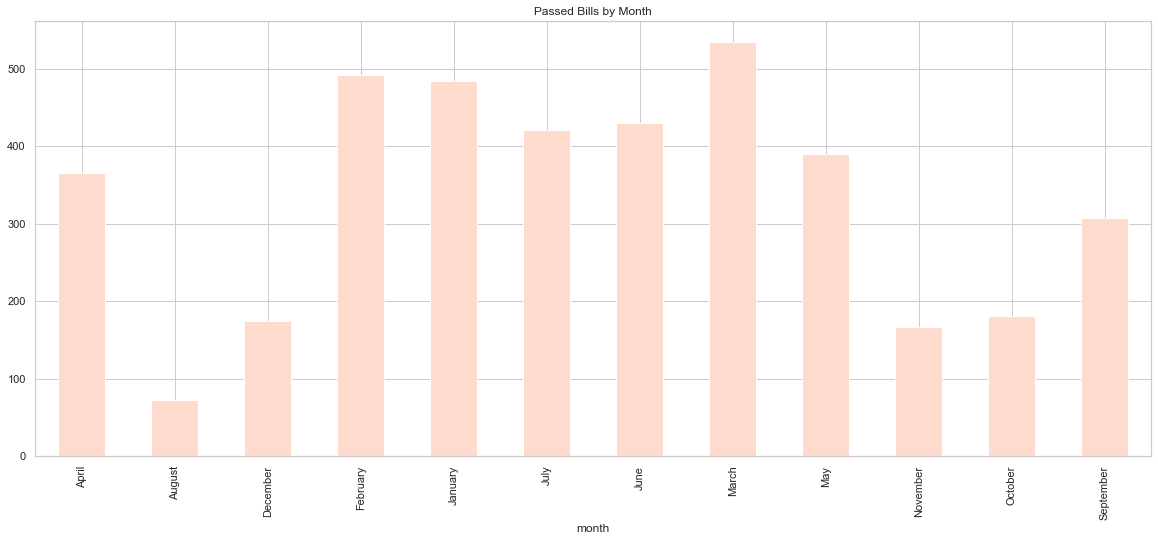

In [192]:
passed_bills.groupby(['month']).size().plot.bar(figsize=(20,8), stacked=True).set_title('Passed Bills by Month')

# month = np.array(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
# plt.xticks(range(len(y)), month)

Text(0.5, 1.0, 'Proposed Bills by Month')

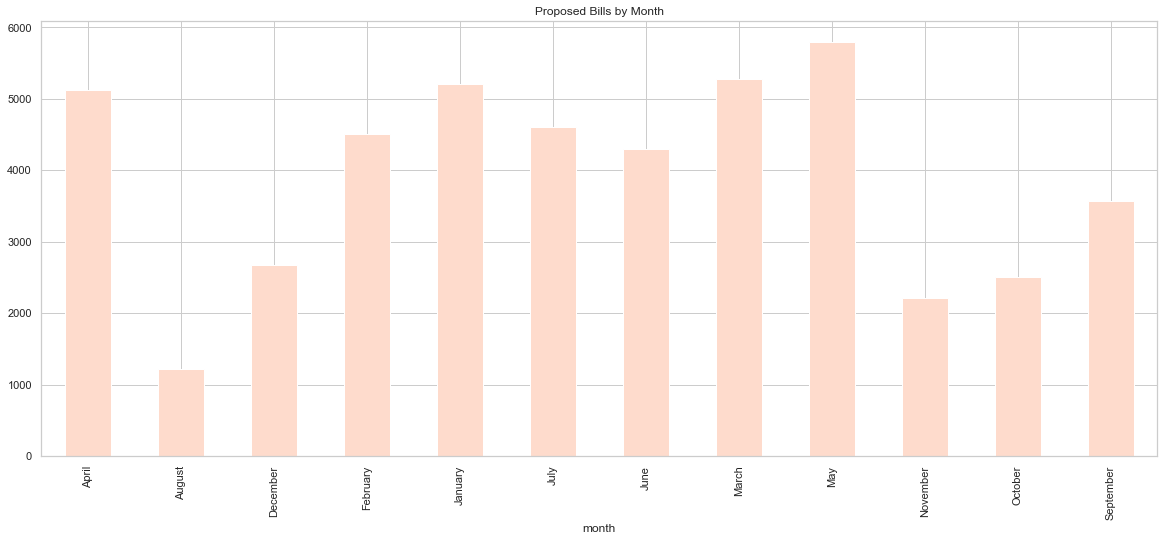

In [193]:
not_passed_bills.groupby(['month']).size().plot.bar(figsize=(20,8), stacked=True).set_title('Proposed Bills by Month')


# month = np.array(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
# plt.xticks(range(len(y)), month)

Text(0.5, 1.0, 'Passed Bills by Month')

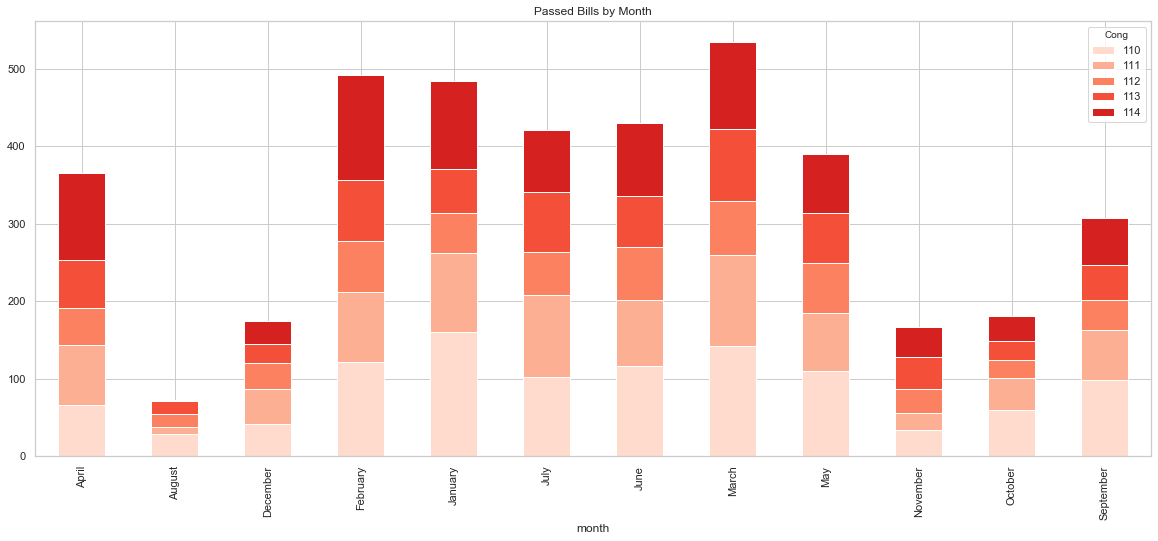

In [194]:

passed_bills.groupby(['month','Cong']).size().unstack().plot.bar(figsize=(20,8), stacked=True).set_title('Passed Bills by Month')

In [195]:
passed_bills['month'].value_counts()

March        535
February     492
January      484
June         430
July         421
May          390
April        366
September    308
October      181
December     174
November     167
August        73
Name: month, dtype: int64

In [196]:
unique_months = passed_bills['month'].unique()

unique_months

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

Text(0.5, 1.0, '')

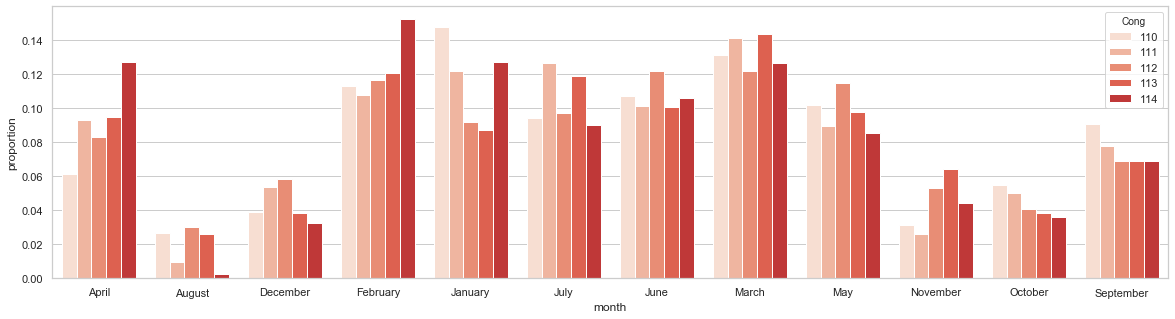

In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.color_palette("RdBu", 10)

plt.figure(figsize=(20,5))

        
x, y, hue = "month", "proportion", "Cong"
# x_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
# hue_order = ["1", "0"]
data=passed_bills

passed_bills[x].groupby(passed_bills[hue]).value_counts(normalize=True, sort=False).sort_index().rename(y).reset_index().pipe((sns.barplot, 'data'), x=x, y=y, hue=hue).set_title('')

# month = np.array(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
# plt.xticks(range(len(y)), unique_months)

Text(0.5, 1.0, '')

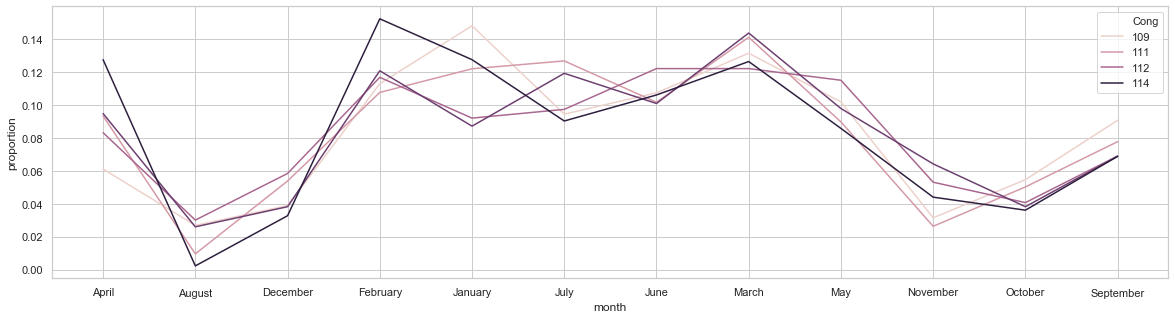

In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_palette("cubehelix")

plt.figure(figsize=(20,5))

# month = np.array(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
# plt.xticks(range(len(f)), month)
# plt.plot(f)
        
x, y, hue = "month", "proportion", "Cong"
# x_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
# hue_order = ["1", "0"]
data=passed_bills

passed_bills[x].groupby(passed_bills[hue]).value_counts(normalize=True).rename(y).reset_index().pipe((sns.lineplot, 'data'), x=x, y=y, hue=hue).set_title('')

# month = np.array(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
# plt.xticks(range(len(y)), month)